In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data file

In [3]:
df=pd.read_csv('bank-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [4]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [5]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    
    

In [6]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,42243
1,29482
2,11760
3,32327
4,13082


In [7]:
df_new.tail()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
45206,36836
45207,44728
45208,44813
45209,41254
45210,19329


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype
---  ------                                                                                                                                                --------------  -----
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  int32
dtypes: int32(1)
memory usage: 176.7 KB


In [9]:
df_new.isna().sum()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [10]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""",45211.0,22605.0,13051.435847,0.0,11302.5,22605.0,33907.5,45210.0


In [11]:
# visualizations

<AxesSubplot:>

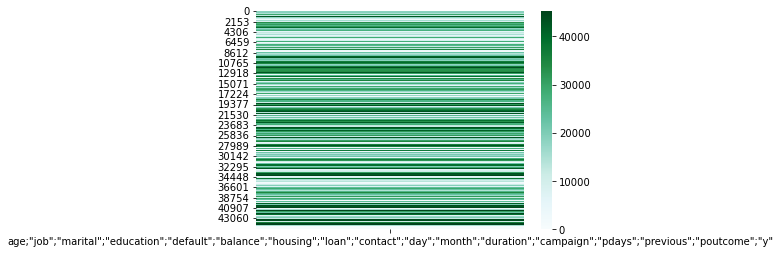

In [12]:
sns.heatmap(df_new,cmap='BuGn')

In [14]:
sns.countplot(x="y",data=df_new,palette="hls") 

ValueError: Could not interpret input 'y'

In [15]:
sns.countplot(x="education",data=df_new,palette="hls") 

ValueError: Could not interpret input 'education'

In [ ]:
sns.countplot(x="job",data=df_new,palette="hls")

In [ ]:
sns.countplot(x="housing",data=df_new,palette="hls")

In [ ]:
# Split dataset in input and output
X=df_new.iloc[:,0:16]
Y=df_new['y']

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank = LogisticRegression(class_weight={0:0.3,1:0.7})
bank.fit(X,Y)

In [ ]:
 # coefficients of features 
bank.coef_

In [ ]:
# Probability values  
bank.predict_proba(X)

In [ ]:
y_pred = bank.predict(X)
df_new["y_pred"] = y_pred
df_new  

In [ ]:
Y.value_counts()

In [ ]:
y_prob = pd.DataFrame(bank.predict_proba(X.iloc[:,:]))
new_df = pd.concat([df_new,y_prob],axis=1)
new_df  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

In [ ]:
# Show confusion matrix in a separate window
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
pd.crosstab(Y,y_pred)

In [ ]:
#type(y_pred)
accuracy = sum(Y==y_pred)/df_new.shape[0]
accuracy 

In [ ]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,bank.predict(X))
Logit_roc_score  

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y,bank.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


In [ ]:
y_prob1 = pd.DataFrame(bank.predict_proba(X)[:,1]) 
y_prob1 

In [ ]:
# calculate the fpr and tpr
print(fpr)
   
print(tpr)

In [ ]:
# to find the allthreshold values

from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(bank.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

In [ ]:
# to find the best fited threshold

from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

In [ ]:
# model-2 (after finding the best fitted threshold )

threshold =0.245137
preds = np.where(bank.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))   

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y,preds)
print (confusion_matrix1) 

In [ ]:
# Show confusion matrix in a separate window
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()